# Project: Communicate Data Findings

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Intro**: I used the fordgobike-trip dataset that contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> In this analysis,  I will try to answer these three questions:
1. When are most trips taken in terms of time of day, or day of the week?
2. How long does the average trip take? and what are the factors that affect it?
3. Does the above depend on if a user is a subscriber or customer?

<a id='wrangling'></a>
## Data Wrangling

> **Intro To This Section**: In this section of the report, I will load in the data, check for cleanliness, and then clean the dataset for analysis. 

### General Properties

In [1]:
# First, I will import the libraries I will work with
import pandas as pd 
import matplotlib as plts
import numpy as np
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# I will load the data 
df1 = pd.read_csv('201902-fordgobike-tripdata.csv')
df = df1.copy()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assessing Data Part

In [3]:
# There are some NaN values in some columns  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# I will see the number of unique values in my dataset 
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
# There is no duplicates in our data
df.duplicated().sum()

0

### assessing part 
> I found that: 
1. There are some NaN values in some columns, so I will remove these values 
2. The format of the end_time and start_time columns is not good
3. I will drop the useless columns 
4. member_birth_year column is not useful, but I will get the client age for each client from it 

## cleaning part

In [6]:
# First I will drop the NaN values 
df.dropna(inplace = True)

In [7]:
# The format of the end_time and start_time columns is not good, so I will change it  
df['end_time'] = pd.to_datetime(df['end_time'])
# I will make separate the end_time column into three-column which are End-Time-month, End-Time-day, and End-Time-hour
df['End-Time-month'] = df['end_time'].dt.month_name()
df['End-Time-day'] = df['end_time'].dt.day_name()
df['End-Time-hour'] = df['end_time'].dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,End-Time-month,End-Time-day,End-Time-hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,March,Friday,8
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,March,Friday,5
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,March,Friday,4
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,March,Friday,0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,March,Friday,0


In [8]:
# I will make separate the start_time column into three-column which are start-Time-month, start-Time-day, and start-Time-hour
df['start_time'] = pd.to_datetime(df['start_time'])
df['start-Time-month'] = df['start_time'].dt.month_name()
df['start-Time-day'] = df['start_time'].dt.day_name()
df['start-Time-hour'] = df['start_time'].dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,End-Time-month,End-Time-day,End-Time-hour,start-Time-month,start-Time-day,start-Time-hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,March,Friday,8,February,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,March,Friday,5,February,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,March,Friday,4,February,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,March,Friday,0,February,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,March,Friday,0,February,Thursday,23


In [9]:
# I will drop the useless columns 
df.drop([ 'start_time', 'end_time', 'start_station_id', 'end_station_id', 'start_station_longitude',
         'end_station_longitude', 'start_station_latitude', 'end_station_latitude', ], axis = 1, inplace = True)

In [10]:
# I will get the member age for each client from member_birth_year column 
df['member_age'] = df['member_birth_year'] - 2019  
df['member_age'] =df['member_age'] * -1

<a id='eda'></a>
## Exploratory Data Analysis

> **Intro To This Section**: In this part, I will answer my questions. 

### When are most trips taken in terms of time of day, or day of the week?
>**what is the importance of this question?** 
> This question is important because The answer to this question will be like a measure that will say to the company what is Peak traffic periods and how to distribute their bikes more effectively

>**How I will get the answer to this question?**
> I will see the number of clients that begin or end their trip for each of the following:
1. The days of week 
2. Hour of days 


In [11]:
# We will first see the number of clients per day for each day of the week 
df['End-Time-day'].value_counts()

Thursday     33707
Tuesday      30591
Wednesday    28417
Friday       27655
Monday       25641
Sunday       14519
Saturday     14422
Name: End-Time-day, dtype: int64

Text(0.5, 1.0, 'The number of clients per day')

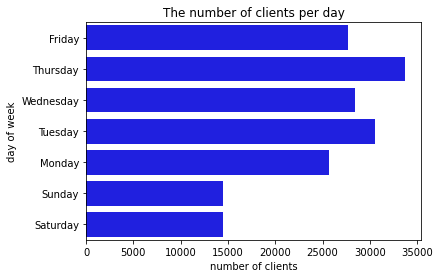

In [12]:
sb.countplot(data = df, y = df['End-Time-day'], color = 'blue')
plt.ylabel("day of week")
plt.xlabel('number of clients')
plt.title('The number of clients per day')

> This chart see us the number of clients for each day of the week 

> From this chart we can say that days of the holiday are less in the number of clients and don't reach to 15000 clients per day 

> From this chart we can say that Thursday, Tuesday, and Wednesday in order are more in the number of clients and reach to more than 30000 clients per day 

Text(0.5, 1.0, 'The trips of according the days of the week ')

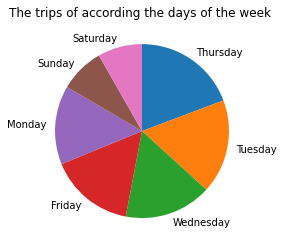

In [13]:
sorted_counts = df['End-Time-day'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title('The trips of according the days of the week ')

> some people prefer pie charts, So I made one. The conclusions of the previous chart are the same conclusions of this chart 

In [14]:
# We will first see the number of clients per hour for each hour of the day
df['start-Time-hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start-Time-hour, dtype: int64

Text(0.5, 1.0, 'The number of trips begin per hour of the day')

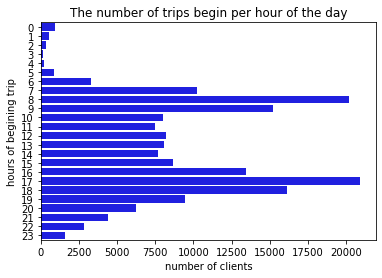

In [15]:
sb.countplot(data = df, y = df['start-Time-hour'], color = 'blue')
plt.ylabel("hours of begining trip")
plt.xlabel('number of clients')
plt.title('The number of trips begin per hour of the day')

> This chart see us the number of clients that begin trips for each hour of the day 

> From this chart we can say that the first hours of the morning are less in the number of trips that begin and don't reach 1000 trips per hour

> From this chart we can say that 17, 8, and 18 o'clock in order are more in the number of trips that begin and reach to more than 15000 trips per hour 

In [16]:
df['End-Time-hour'].value_counts()

17    20322
8     19012
18    17468
9     16973
16    12526
19    10227
10     8538
7      8448
15     8292
12     8139
13     8086
14     7696
11     7212
20     6622
21     4701
22     3099
6      2802
23     1747
0       965
5       738
1       541
2       405
4       225
3       168
Name: End-Time-hour, dtype: int64

Text(0.5, 1.0, 'The number of trips end per hour of the day')

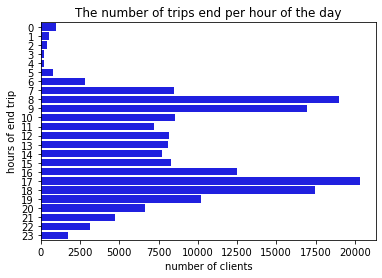

In [17]:
sb.countplot(data = df, y = df['End-Time-hour'], color = 'blue')
plt.ylabel("hours of end trip")
plt.xlabel('number of clients')
plt.title('The number of trips end per hour of the day')

> The conclusions of the previous chart that was about the usual times of begin trips are the same conclusions of this chart that was about the usual times of end trips.
> This leads us to conclude that the trips in usually don't take an hour

Text(0.5, 1.0, 'the correlation between the usual time of begin and end trips')

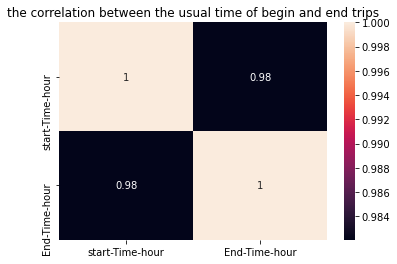

In [18]:
# Finally I want to see the correlation between the usual time of begin and end trips 
# If our previous conclusions are true, then the correlation should be so high 
sb.heatmap(
    df.loc[:, ["start-Time-hour", 'End-Time-hour']].corr(),
    annot=True
)
plt.title('the correlation between the usual time of begin and end trips')

 > the percent of the correlation between the usual time of begin and end trips is so high which prove our pervous conclusion 

### How long does the average trip take? and what are the factors that affect it?
>**what is the importance of this question?** 
the time that the trip take is affecting the money the company will have. because increasing the time of the trip meaning increase the money the company will get from the client, so the success of the company, in this case, is to make the trip time longer.
>The answer to this question will be a measure that will help the company to put the plan to increase their revenues. 

>**How I will get the answer to this question?**

> I will see the average trip take 
> then, I will see the relationship between the trip duration and each of the following:
1. The start station
2. The end station  
3. The start hour of the trip 
4. The end hour of the trip 
5. The days that the trip in  

In [19]:
#The average trip takes 
df['duration_sec'].mean() /60 

11.733379060161264

> The mean duration of the trips is about 12 minutes which is logical because most of the trips in it the hour of end and beginning the trip is the same 

Text(0.5, 1.0, 'The distribution of the trip duration')

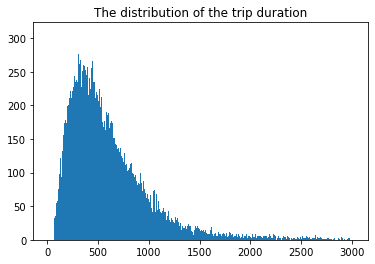

In [20]:
bin_edges = np.arange(10.5, 3000+10, 1)
plt.hist(data = df, x='duration_sec', bins = bin_edges);
plt.title('The distribution of the trip duration')

> This chart shows us the distribution of the trip duration and shows us that most of the trip's duration is between 500 and 1000 second  in most of the cases    

In [21]:
df['duration_minutes'] = df['duration_sec']  / 60
df['duration_minutes'].astype(np.float64)
df.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,End-Time-month,End-Time-day,End-Time-hour,start-Time-month,start-Time-day,start-Time-hour,member_age,duration_minutes
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,March,Friday,8,February,Thursday,17,35.0,869.750000
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,March,Friday,5,February,Thursday,12,47.0,1030.900000
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,March,Friday,4,February,Thursday,17,30.0,608.166667
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,March,Friday,0,February,Thursday,23,45.0,26.416667
5,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,March,Friday,0,February,Thursday,23,60.0,29.883333


In [22]:
# First I will make a function that will help us to get the top 5 of something according to the trip duration 

def thing_effect_on_duration_sec(thing):
    thing = pd.DataFrame(thing)
    thing.sort_values(by=['duration_sec'], axis =0, ascending=False, inplace = True)
    print(thing.head(5))    



In [23]:
duration_per_start_station = df.groupby('start_station_name')['duration_sec'].mean()
thing_effect_on_duration_sec(duration_per_start_station)

                           duration_sec
start_station_name                     
San Antonio Park            2647.962264
Palm St at Willow St        2467.333333
Foothill Blvd at 42nd Ave   1859.478261
Empire St at 7th St         1789.785714
Fell St at Stanyan St       1706.942308


In [24]:
duration_per_end_station = df.groupby('end_station_name')['duration_sec'].mean()
duration_per_end_station = duration_per_end_station 
thing_effect_on_duration_sec(duration_per_end_station)

                                       duration_sec
end_station_name                                   
16th St Depot                          26000.166667
Willow St at Vine St                    3535.600000
Lane St at Revere Ave                   2035.239130
Fell St at Stanyan St                   1888.659864
Backesto Park (Jackson St at 13th St)   1832.555556


In [25]:
duration_per_start_trip_time = df.groupby('start-Time-hour')['duration_sec'].mean()
thing_effect_on_duration_sec(duration_per_start_trip_time)

                 duration_sec
start-Time-hour              
3                 1471.884146
2                 1069.780282
13                 829.559150
14                 827.401068
15                 812.843164


In [26]:
duration_per_end_trip_time = df.groupby('End-Time-hour')['duration_sec'].mean()
thing_effect_on_duration_sec(duration_per_end_trip_time)

               duration_sec
End-Time-hour              
2               1160.301235
3               1041.815476
0                912.940933
4                896.564444
15               831.370719


In [27]:
duration_per_day = df.groupby('start-Time-day')['duration_sec'].mean()
thing_effect_on_duration_sec(duration_per_day)

                duration_sec
start-Time-day              
Sunday            858.673649
Saturday          849.771750
Monday            696.970906
Friday            681.274699
Thursday          678.289748


Text(0.5, 1.0, 'The correlation between trip duration and the start and the end time of the trip')

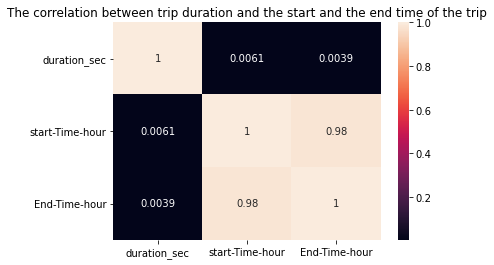

In [28]:
# Finally, I want to see the correlation between all the numeric factors that affect the trip duration
sb.heatmap(
    df.loc[:, ['duration_sec', 'start-Time-hour', 'End-Time-hour']].corr(),
    annot=True
)
plt.title('The correlation between trip duration and the start and the end time of the trip')

> The heat map shows us that the correlation between the time of the end and beginning the trip doesn't affect on the trip duration

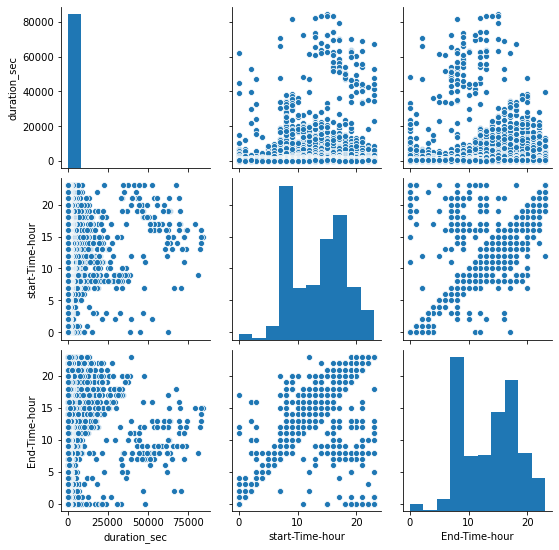

In [29]:
sb.pairplot(data=df[['duration_sec', 'start-Time-hour', 'End-Time-hour']])

> I made this chart to see the weak correlation visually and to prove the weak correlation and that the time of the end and beginning the trip doesn't affect the trip duration

### 3. Does the above depend on if a user is a subscriber or customer?
>**what is the importance of this question?** 
> The answer to the question will give us the characteristics of the clients of the company which will help in making a good market segmentation. The market segmentation helps the companies in growth and marketing their products 

>**How I will get the answer to this question?**


I will see the relationships between following factors and each other:
1. user type 
2. the geneder of the client
3. duration_sec 
4. The start time of the trip 
5. The end time of the trip 
6. the age of the client 
7. bike share for all trip

In [30]:
# First I will get the number of the customers and the Subscribers of the service
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [31]:
# then, I will get the percent of the customers that are not Subscribed
print("The percent of the customers that are not Subscribed",df['user_type'].value_counts()[1] / df['user_type'].value_counts() [0])

The percent of the customers that are not Subscribed 0.10459257762681046


In [32]:
# the mean of the clients' age 
df['member_age'].mean()

34.196865425945404

Text(0.5, 1.0, 'The distrubtion of the age of the clients')

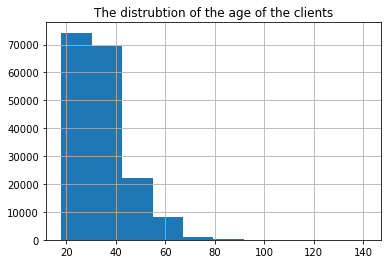

In [33]:
# the distribution of the age of the clients
df['member_age'].hist()
plt.title('The distrubtion of the age of the clients')

> This graph shows us that the ages of our clients are from 20 to 40 years old 

In [34]:
df.groupby('user_type')['member_gender'].value_counts()

user_type   member_gender
Customer    Male              11493
            Female             4623
            Other               450
Subscriber  Male             119007
            Female            36182
            Other              3197
Name: member_gender, dtype: int64

Text(0.5, 1.0, 'The type of the client')

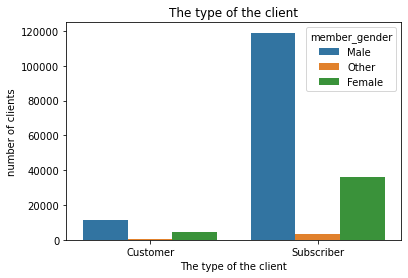

In [35]:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender')
plt.ylabel("number of clients")
plt.xlabel('The type of the client')
plt.title('The type of the client')

> This graph shows us three things: 
    1. The gap between the number of the customer and the subscriber is so high 
    2. The gap between the number of males and females is so high 
    3. Most of our customers are males which lead us to say that the company failed to market its services to the female 

In [36]:
df.groupby('user_type')['duration_sec'].mean()


user_type
Customer      1310.656103
Subscriber     640.551305
Name: duration_sec, dtype: float64

In [37]:
df.groupby('user_type')['start-Time-day'].value_counts()


user_type   start-Time-day
Customer    Thursday           2868
            Friday             2541
            Monday             2309
            Sunday             2299
            Tuesday            2268
            Saturday           2171
            Wednesday          2110
Subscriber  Thursday          30844
            Tuesday           28316
            Wednesday         26316
            Friday            25122
            Monday            23332
            Saturday          12243
            Sunday            12213
Name: start-Time-day, dtype: int64

Text(0.5, 0, 'The type of the client')

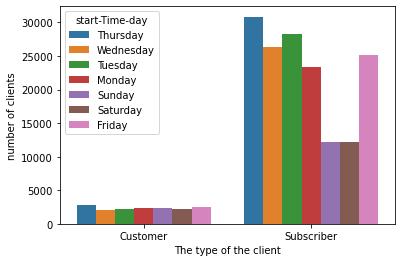

In [38]:
sb.countplot(data = df, x = 'user_type', hue = 'start-Time-day')
plt.ylabel("number of clients")
plt.xlabel('The type of the client')

> this graph shows us the that:
   1. the busy day is the same for the customers and subscribers 
   2. there is no a big gap between the days of the week for the customers 


In [39]:
df.groupby('user_type')['End-Time-hour'].value_counts()

user_type   End-Time-hour
Customer    17                2043
            18                1550
            8                 1419
            16                1359
            9                 1265
            14                1141
            15                1129
            13                1032
            11                 917
            12                 913
            10                 807
            19                 792
            7                  485
            20                 482
            21                 347
            22                 275
            23                 180
            6                  152
            0                   99
            1                   58
            5                   56
            2                   34
            4                   19
            3                   12
Subscriber  17               18279
            8                17593
            18               15918
            9                

In [40]:
df.groupby('user_type')['duration_sec'].mean()


user_type
Customer      1310.656103
Subscriber     640.551305
Name: duration_sec, dtype: float64

In [41]:
df.groupby('bike_share_for_all_trip')['duration_sec'].mean()


bike_share_for_all_trip
No     706.204504
Yes    683.997521
Name: duration_sec, dtype: float64

Text(0.5, 1.0, 'The trip duration according to the hour of start trip')

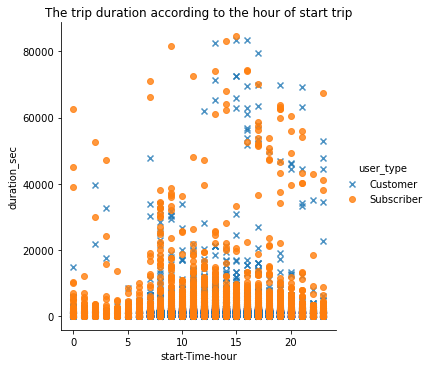

In [42]:
sb.lmplot(x='start-Time-hour', y='duration_sec', hue='user_type', 
           data=df.loc[df['user_type'].isin(['Customer','Subscriber'])], markers=['x', 'o'],
           fit_reg=False)
plt.title('The trip duration according to the hour of start trip')

This graph shows us that:
   1. the trip duration of the customers is more than the trip duration of the subscribers
   2. from 15 o'clock to 20 is a busy time in the day

Text(0.5, 1.0, 'The correlation between client age and the start and the end time of the trip')

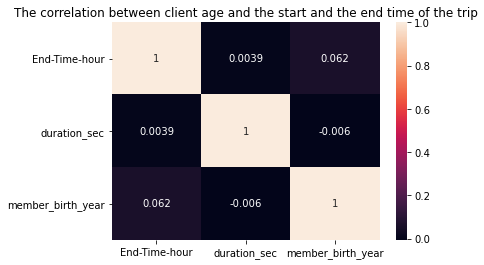

In [43]:
sb.heatmap(
    df.loc[:, ['End-Time-hour', 'duration_sec', 'member_birth_year']].corr(),
    annot=True
)
plt.title('The correlation between client age and the start and the end time of the trip')

>This heat map shows us that there is no orrelation between client age and the start and the end time of the trip

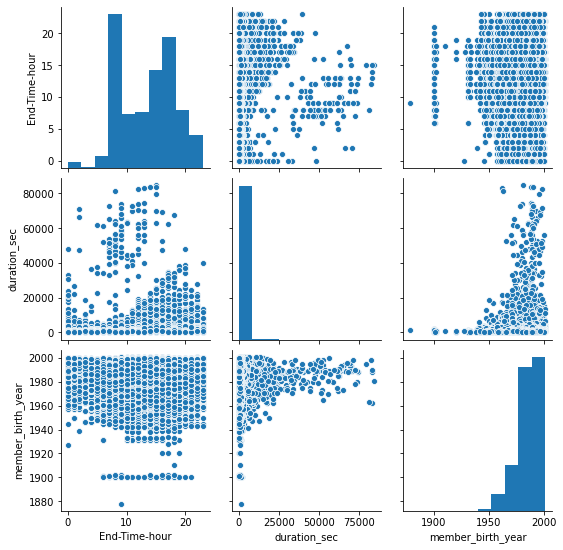

In [44]:
sb.pairplot(data=df[['End-Time-hour', 'duration_sec', 'member_birth_year']])

> I made this chart to see the weak correlation visually and to prove the weak correlation and that the time of the end and beginning the trip doesn't affect the trip duration

<a id='conclusions'></a>
##  The Summary Conclusions

1. The days of the holiday are less in the number of clients and don't reach to 15000 clients per day 

2. Thursday, Tuesday, and Wednesday in order are more in the number of clients and reach to more than 30000 clients per day

3. the first hours of the morning are less in the number of trips that begin and don't reach 1000 trips per hour

4. 17, 8, and 18 o'clock in order are more in the number of trips that begin and reach to more than 15000 trips per hour 

5. The mean duration of the trips is about 12 minutes which is so low and most of the clients don't use the bike for all the trip

6. The gap between the number of the customer and the subscriber is so high 

7. The gap between the number of males and females is so high which lead us to say that the company failed to market its services to the female

8. The busy day is the same for the customers and subscribers 

9. The trip duration of the customers is more than the trip duration of the subscribers

10. from 15 o'clock to 20 is a busy time in the day
> **The Limitation of this analysis**
>>The data is 183412 row over one month, So the data is so limited, but it gives us a general look at the characterics of the clients and the busy days and hours 